# Data Import and Setup
The data and required libraries are imported to create a dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load product data from the spreadsheet
df_products = pd.read_excel("/content/product_sales.xlsx")



SALES CALCULATION

In [ ]:
# Calculate total sales
df_products["Total_Sales"] = df_products["Units_Sold"] * df_products["Unit_Price"] #Changed 'df' to 'df_products'

# Display the  DataFrame
print(df_products)

                      Product_Name  Units_Sold  Unit_Price  Unit_Cost  \
0                       Amlodipine         120        3000    1190.74   
1                      Chloroquine         200        4500    1672.87   
2                        Ibuprofen         150        2500     780.60   
3                        Metformin         180        5000    1028.00   
4                        Vitamin C          90        1200     350.62   
5                      Paracetamol         300        2800    1026.30   
6                      Moisturizer         110        3500    1308.53   
7                         Cleanser         140        2000     640.42   
8                Hydrogen Peroxide         190        1800     678.41   
9                      Semaglutide         160        5500    1188.94   
10                        Naproxen         170        2300     768.86   
11                      Folic Acid         210        1500     524.31   
12               Methylated Spirit          95     

In [ ]:
# Shows the first few rows
df_products.head()

,Product_Name,Units_Sold,Unit_Price,Unit_Cost,Category,Product_Code,Total_Sales
0,Amlodipine,120,3000,1190.74,Antihypertensive,AHP1,360000
1,Chloroquine,200,4500,1672.87,Antimalarial,ATM1,900000
2,Ibuprofen,150,2500,780.60,Analgesic,ANG1,375000
3,Metformin,180,5000,1028.00,Antidiabetic,ADB1,900000
4,Vitamin C,90,1200,350.62,Supplement,SUP1,108000


In [ ]:
 #Calculate sum of total sales
grand_total_sales = df_products["Total_Sales"].sum()

# Display the result
print("Grand Total Sales:", grand_total_sales)


Grand Total Sales: 12436500


In [ ]:
# Calculate total units sold
total_units_sold = df_products["Units_Sold"].sum()

# Display the result
print("Total Units Sold:", total_units_sold)


Total Units Sold: 3825


In [ ]:
# Calculate total sales per category
category_sales = df_products.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False).reset_index()
category_sales

,Category,Total_Sales
0,Antiallergies,1853000
1,Antidiabetic,1780000
2,Analgesic,1606000
3,Antiseptic,1532000
4,Antimalarial,1480000
5,Antibiotics,1361500
6,Supplement,774000
7,Cosmetics,665000
8,Contraceptive,600000
9,Antihypertensive,560000


COST CALCULATION

In [ ]:
# Calculate Drug Cost
df_products["Total_Drug_Cost"] = np.round(df_products["Unit_Cost"] * df_products["Units_Sold"], 2) # Changed 'df' to 'df_products'

# Display
print(df_products)

                      Product_Name  Units_Sold  Unit_Price  Unit_Cost  \
0                       Amlodipine         120        3000    1190.74   
1                      Chloroquine         200        4500    1672.87   
2                        Ibuprofen         150        2500     780.60   
3                        Metformin         180        5000    1028.00   
4                        Vitamin C          90        1200     350.62   
5                      Paracetamol         300        2800    1026.30   
6                      Moisturizer         110        3500    1308.53   
7                         Cleanser         140        2000     640.42   
8                Hydrogen Peroxide         190        1800     678.41   
9                      Semaglutide         160        5500    1188.94   
10                        Naproxen         170        2300     768.86   
11                      Folic Acid         210        1500     524.31   
12               Methylated Spirit          95     

In [ ]:
#Calculate sum of total drug cost
grand_total_drug_cost= df_products["Total_Drug_Cost"].sum()

# Round the result to 2 decimal points
grand_total_drug_cost = round(grand_total_drug_cost, 2)

# Display the result
print("Grand Total Drug Cost:", grand_total_drug_cost)

Grand Total Drug Cost: 3988846.45


In [ ]:
# 1️⃣ Save as a CSV File (.csv)

df_products.to_csv("product_sales_python_analysis.csv", index=False)

# Visualizations

<ipython-input-55-4e8d4e4920d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Category", y="Total_Sales", palette="inferno")


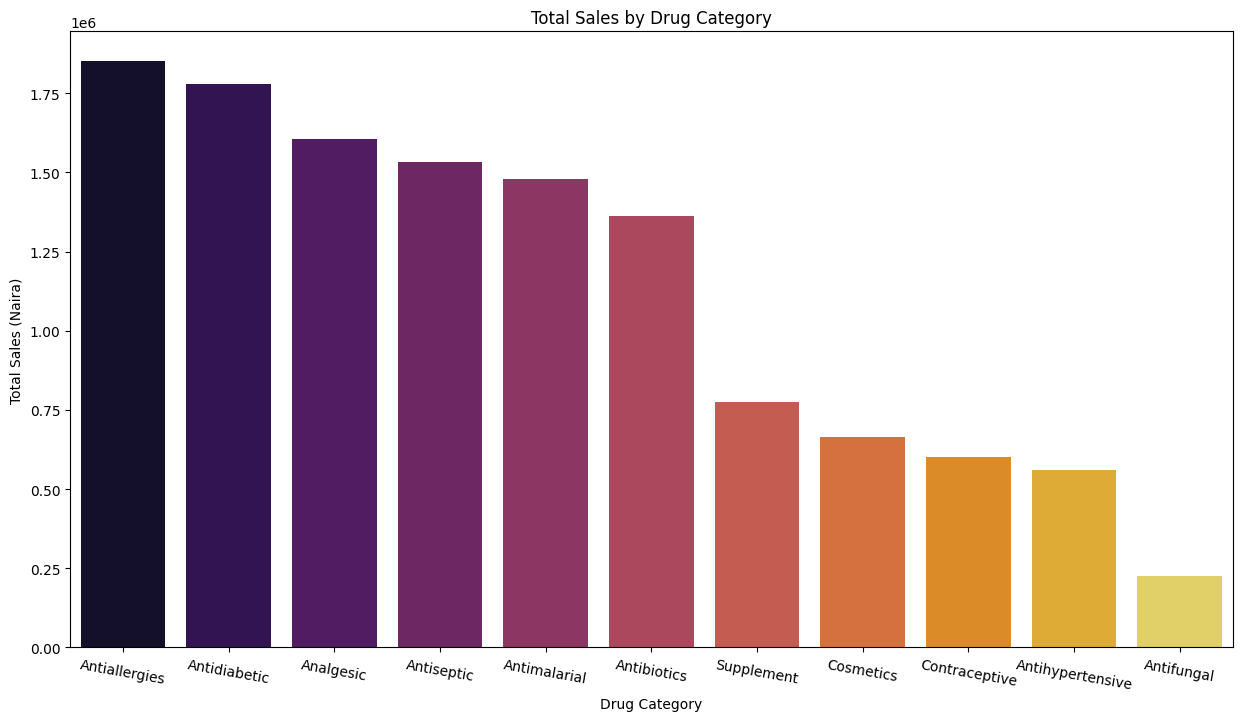

In [ ]:
# Sales by Category
plt.figure(figsize=(15, 8))
sns.barplot(data=category_sales, x="Category", y="Total_Sales", palette="inferno")
plt.title("Total Sales by Drug Category")
plt.xlabel("Drug Category")
plt.ylabel("Total Sales (Naira)")
plt.xticks(rotation=350)
plt.show()

In [ ]:
# File path
file_path = "/content/PHARMACY SALES SHEET.xlsx"


In [73]:
# Load Excel file and check sheet names
xls = pd.ExcelFile(file_path)
print("Available Sheets:", xls.sheet_names)


Available Sheets: ['SALES ', 'COST', 'EXPENSES', 'BALANCE SHEET']


In [75]:
# Load the balance sheet (
sheet_name = "EXPENSES"
df = pd.read_excel(xls, sheet_name=sheet_name)


In [76]:
# Display the first few rows to understand the structure
print(df.head())


  Fixed Cost Unnamed: 1  Variable Cost Unnamed: 3           Unnamed: 4  \
0   Salaries       Rent  Drug Purchase  Logistics  Drug Damage/ Expiry   
1    2000000     450000     3988846.45     210000                60000   

   Total Fixed Cost\t  Total Variable Cost  Grand Total Expenses  
0           2450000.0           4258846.45            6708846.45  
1                 NaN                  NaN                   NaN  


<ipython-input-78-4909e2c5a031>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=business_expenses_df, x="Expense_Type", y="Amount", palette="viridis")


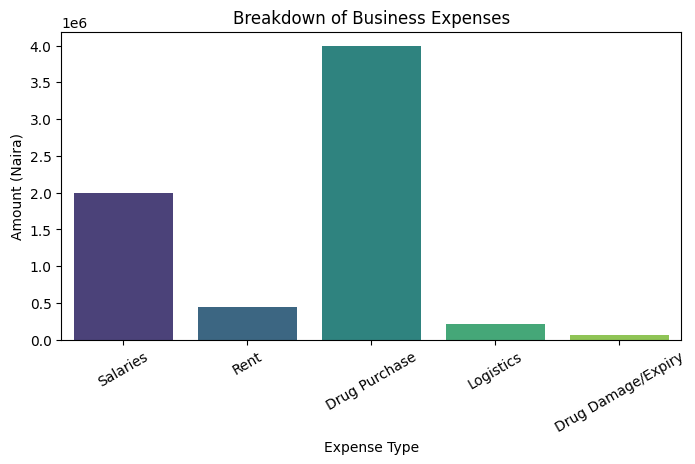

In [78]:
#  DataFrame for balance sheet
expense_categories = ["Salaries", "Rent", "Drug Purchase", "Logistics", "Drug Damage/Expiry"]
expense_values = [2000000, 450000, 3988846.45  , 210000, 60000]

business_expenses_df = pd.DataFrame({"Expense_Type": expense_categories, "Amount": expense_values})

# Plot the breakdown of other business expenses
plt.figure(figsize=(8, 4))
sns.barplot(data=business_expenses_df, x="Expense_Type", y="Amount", palette="viridis")
plt.title("Breakdown of Business Expenses")
plt.xlabel("Expense Type")
plt.ylabel("Amount (Naira)")
plt.xticks(rotation=30)
plt.show()
